<a href="https://colab.research.google.com/github/rajraina1/datascience/blob/main/%5BWomen's_Tennis%5D_Performance_Optimization_using_MoveNet_Lightning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Women's Tennis: How does a Player's Posture Between Points affect Athletic Outcomes?

#OVERVIEW

Existing empirical research in athletic posture analysis either deals with a player's posture *during* points (i.e. stroke-mechanics) ; or , with a player's posture immediately following victory.

Using **women's tennis** as a case study, this research **examines players' posture *between* points**, throughout the match, as a potentially **distinguishing factor of skill** . We employ MoveNet AI's Deeplearning Pose Estimation Rendering to empirically answer the following question.

> QUESTION: Do **top-ranked** WTA tennis players exhibit **stronger posturing between points**, compared to **lower-ranked** Women's Challenger tennis players?

An affirmative response to this question would suggest that in addition to stroke mechanics, coaches and players should place special emphasis on **between-point posture** as a driver of **long-term athletic success**.

![text](https://drive.google.com/uc?export=view&id=1VE4IRCMfL3bcCrcQF7CG9L3gYI95efQn)

To empirically answer this question, we look at **equally-skilled matches** and employ the following methodology:

> 1) Take a simple random sample of $X=30$ images from WTA & Challengers atheletes' posture between points (*),

> 2) Use MoveNet AI & tensorflow to systematically classify each posture as negative, neutral, or positive.

Because the postures are **drawn at random** and from equally-skilled matches, the posture would not be related to one player completely dominating (or being dominated by) another. We then use our **systematic posture classification** to examine whether there is an empirical difference between top-ranked WTA players and lower ranked women's Challenger players.  

This research is the **first to examine** whether *between-point* posture differentiates atheletes, instead of traditional research which focuses on *during-point* stroke analysis or *post-game* posture analysis. Please see the **full Python code**, which includes **MoveNet rendering** & statistical analysis tools, at [Raj's Google Colab Doc](https://colab.research.google.com/drive/1sBl3iQHMe2RDq8ErY4aDI-R7S2rgHWbR?usp=sharing).

 (*) Note that due to time and resource restraints, the chosen value of $X$ is relatively small. This analysis is not airtight, but is intended as a proof-of-concept to show the researcher's facility with classical pose-estimation tools and ability to formulate an interesting & relevant problem, and to execute on a reasonable methodology.


#DATA COLLECTION

We scrape $X=30$ images from various female tennis matches. Images are drawn as in a simple random sample, selected **uniformly and at random** across the duration of the match, subject to the following restrictions:

*   15 images are taken from top-ranked WTA players in equally-skilled matches (**Serena Williams** in Serena VS Venus matches, **Aryna Sabalenka** in Sabalenka VS Swiatek matches, and **Maria Sharapova** in Sharapova VS Wozniaki matches)
*   15 images are taken from lower-ranked Challengers female players in equally-skilled matches (**Priscilla Hon** in Hon VS Birell matches, **Eva Lys** in Lys VS Vondrousova matches, **Lou Brouleau** in Brouleau VS Thamchaiwat matches)
* All images are drawn from when the players are *between* points.


We then process each image using MoveNet Lightning's Deeplearning Pose Estimation Rendering tool to rigorously map limb location and relative distances. We use the resulting pose estimation to gather an empirical "pose-value" , which maps to a classification of each posture as negative, neutral, or positive based on our own empirical classification algorithm (detailed in the next section).

Hence, each of the 30 images is reduced to a three-dimensional **(string, decimal, string)** vector which captures **(player, empirical pose value, pose classification)**. For example, sample data may look like:

**(Serena Williams, 0.453, negative pose)**

**(Aryna Sabalenka, 0.321, positive pose)**

etc.

Finally, we use a **t-test on summary statistics** to evaluate whether there is a posture difference between the top-ranked WTA players and the lower-ranked WTA players.




#Empirical Classification of Posture

Classical and **well established research** suggests the following:

1.   A common **power/victory pose** is captured by an **"arms-above-the-head"** posture
2.   Striking a particular pose **affects a person's mindset**, regardless of whether the person is striking the pose conciously, or even if they are forcing themselves into the posture.


![text](https://drive.google.com/uc?export=view&id=1BW7GV6sYdhjGLDHhirswfZOQoxMOZz6X)


Hence, Point 1) suggests that we can estimate the "positivity" of a posture by examining the **distance** between the **players' hands and her head**. Point 2) implies that the **closer** the hands are to the head, the **more "positive"** the player will feel, whether or not the action is concious, or **even if it is forced**. The exception to this rule is if the hand is directly on the face, indicating hesitation (negative posture), or if the hands are above the head in exasperation (negative posture). We handle these cases separately.

But, if one player is shorter than another, the shorter player's hands will be closer to her head by default, even at a completely neutral posture. Hence, we **normalize** by overall **player height** to account for this.

Specifically, we use the following **empirical formula** to assign the following empirical pose value to each players' posture:

$\text{empirical pose value} = \frac{\text{(right eye height - right wrist height) + (left eye height - left wrist height)}}{\text{(right eye height - right ankle height) + (left eye height - left ankle height)}}$

Each of these keypoints is captured by MoveNet's posture recognition, detailed [here](https://tfhub.dev/google/movenet/singlepose/lightning/4).

Note that **smaller** empirical pose values imply a **more positive posture**. Indeed, as the hands approach the head, the numerator gets smaller and the pose gets more positive; if the hands were above the head entirely (the strongest posture), then the numerator would be negative and the empirical pose value would be negative overall. Smaller empirical pose values also can result from a large denominator, which means that the eyes and ankles are far apart and the player is erect (as opposed to hunched) in stature. All of this indicates that **smaller empirical pose values** imply a **more positive posture**, and vice versa.

Indeed, the postive-posturing of Serena Williams directly above recieved a lower value of -0.0634 when ran through our MoveNet algorithm, whereas the negative posturing below received a higher value of 0.4783, **both as expected** based on qualitative assessment.

![text](https://drive.google.com/uc?export=view&id=1wom9WmcuyPXI4sDkwnnArDoEHOy-vOwY)


#Results and Analysis

To restate the initial question more generally, we examine ...

> How do the **between-point postures** of **top-ranked** WTA tennis players differ from the between-point **postures of lower-ranked** Women's Challenger tennis players?

As detailed in the DATA COLLECTION section, we scraped 30 images: 15 from top-ranked WTA tennis players, and 15 from lower-ranked players. Each image was taken randomly, in between points, and from equally-skilled matches. We then used MoveNet Lightning to determine an empirical pose value and classify it as detailed in the EMPIRICAL CLASSIFICATION section. **All images and analysis** can be found on [Raj's Google Colab Doc](https://colab.research.google.com/drive/1sBl3iQHMe2RDq8ErY4aDI-R7S2rgHWbR?usp=sharing) and the [Player Posture Image Reference Sheet ](https://docs.google.com/spreadsheets/d/1XYoEnYKDukmcAHkx7W9bBJ-sOEzLDQBBNTHWQkx5Iz8/edit#gid=0).

Resulting summary statistics are outlined here:

The following suggests that **WTA players** do, in fact, **exhibit a higher proportion of positive poses** than Challenger-level players (**40%** compared to **27%** of poses classified as positive).

In [ ]:
# Proportion of  poses , by type
df['Proportion'] = pd.qcut(df['Score'], 3, labels=["Positive Poses", "Neutral Poses", "Negative Poses"])
print(df.groupby(['Type','Proportion']).count()['Score']/15)

Type        Proportion    
Challenger  Positive Poses    0.266667
            Neutral Poses     0.333333
            Negative Poses    0.400000
WTA         Positive Poses    0.400000
            Neutral Poses     0.333333
            Negative Poses    0.266667
Name: Score, dtype: float64




```
# This is formatted as code
```

Indeed, even when **averaging across the empirical_pose_values** for both groups, **WTA plays show a slight edge** in more positive posturing (**3.9%** uplift).



In [ ]:
# Avg score by type
print(" Avg Score by Type")
print(df.groupby(['Type'])['Score'].mean())
print("\n StDev Score by Type")


 Avg Score by Type
Type
Challenger    0.398018
WTA           0.383617
Name: Score, dtype: float64

 StDev Score by Type


We also include **each individual player's** mean and stdev **posture score**. Further, there appears to be **no clear separation**, however, between **WTA and Challengers** in the distributional plot of pose_values, shown below.

In [ ]:
#Avg score by player
print(df.groupby(['Type'])['Score'].std())
print("\n Avg Score by Player")
print(df.groupby(['Player'])['Score'].mean())
print("\n StDev Score by Player")
print(df.groupby(['Player'])['Score'].std())

Type
Challenger    0.075714
WTA           0.063723
Name: Score, dtype: float64

 Avg Score by Player
Player
Aryna Sabalenka    0.386870
Eva Lys            0.354640
Lou Brouleau       0.440520
Maria Sharapova    0.370434
Priscilla Hon      0.398895
Serena Williams    0.393548
Name: Score, dtype: float64

 StDev Score by Player
Player
Aryna Sabalenka    0.054136
Eva Lys            0.071674
Lou Brouleau       0.048025
Maria Sharapova    0.072154
Priscilla Hon      0.089495
Serena Williams    0.075642
Name: Score, dtype: float64


Text(0.5, 1.0, 'Pose Values for WTA VS. Challenger')

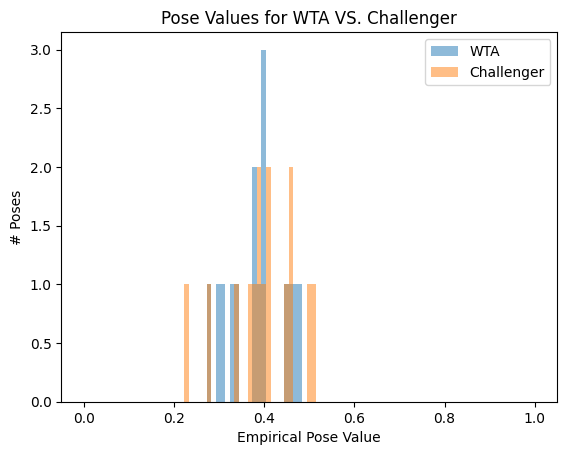

In [ ]:
#Hist by type

WTA = df[df['Type'] == 'WTA']['Score']
Challenger = df[df['Type'] == 'Challenger']['Score']

bins = np.linspace(0, 1, 100)

plt.hist(WTA, bins, alpha=0.5, label='WTA')
plt.hist(Challenger, bins, alpha=0.5, label='Challenger')
plt.legend(loc='upper right')
plt.xlabel('Empirical Pose Value')
plt.ylabel('# Poses')
plt.title('Pose Values for WTA VS. Challenger')


Indeed, a **small effect size** coupled with a **low p-value** makes us ***unable to reject the null hypothesis*** of "no difference between the two groups".

In [ ]:
#t-test by type
tstat, pval = scipy.stats.ttest_ind(df[df['Type'] == 'WTA']['Score'], df[df['Type'] == 'Challenger']['Score'])

print("tstat: " , tstat)
print( "pval: " , pval)

tstat:  -0.5636058490926592
pval:  0.5775088107473891


#Conclusions, Limitations, and Future Work

**Conclusion**

The results of this study suggest that while higher-ranked **WTA players slightly edge out** lower-ranked Challengers in posturing, the low sample size, **small effect size**, and **high p-value** ultimately suggest that **more research is needed** before affirming that higher ranked female tennis players indeed exhibit better posture, on average, than lower ranked female tennis players.

In fact, players between both groups (WTA and Challenger) **exhibited many commonalties in posturing**: clear negative posturing when a match loss was imminent; clear neutral posturing when down big on their own serve; no  incongruity between the point outcome and the posturing, and so on.

Moreover, **each player demonstrated her own distinct pattern of posturing**, and better WTA players appeared to be **no less prone** to negative posturing than did lower-ranked Challenger players. Conversely, lower-ranked players appeared to **exhibit the same pattern of positive posturing** as did the higher-ranked players after winning a point, thus making the conclusion that better players exhibit better posture between points likely **untenable without more research**.

We list some qualitative analysis below:

--------

**Williams** displays strong negative posture after a lost point, and strong positive postures after a won point. Her postures are often more complex — kneeling on the floor, touching the face and screaming, leg kicking, etc.

**Sabalenka** seemed to be more (negatively) emotive with face and eyes, and generally pretty reserved with body postures whether she won or lost the point. Indeed, Sabalenka’s posture scores averaged around the same as Williams’,  but with less variance.

**Sharapova** displayed hardly any signs of negative body posture after a lost point, and only slight positive postures after winning points.

**Hon** was very reserved with her posture after either a won or a lost point. Hon hardly showed positive displays after a won point, and showed very slight negative displays after a lost point. She hung her head frequently, typically an indication of a negative posture, though this was likely done more in thought than out of despair. As a result, her  empirical_pose_values were higher (indicating worse posture, from her head-hanging) though a human interpreter may have reached different conclusions than MoveNet.

**Lys** was the unique player who showed consistent positive posturing after a win. She typically did this in the form of a fist pump. Conversely, she showed hardly any negative displays after a loss.

**Brouleau** in most cases tended towards neutral to negative posturing, with relatively little variance.

-------

The **considerable emotive and posture variation** amongst players — and especially the **appearance of an outlier like Serena Williams**, who displays strong and clear negative posture despite being far and away the best of the selected players —  indicates that positive posture may not be directly correlated with better players.  Instead, it seems that **each player has a distinctive mode of expression**, which can vary considerably from player to player and seems to not be superior or even differentiable when comparing  WTA players to lower-ranked Challengers.

Maintaining a positive posture between-points, then, **likely is far out-dominated by stroke mechanics, hitting power, “clutchness”, and other factors**. This is not to discount the importance of posturing in affecting mental belief, and the importance of mental belief in winning tennis matches, as **both seem to be intuitively stressed by coaches and professionals**. However, in the case of tennis, **intensity of the posture seems more dictated by the intensity of the match**, with more variability in posturing arising from a more engaged crowd during more important moments of the match.

**Limitations and Future Work**

Though the questions posed by the study are unique, there are limitations to the methodology due to resource restraints. Here, we list a few.

First, the **classification of each posture** as negative/neutral/positive, though rooted in empirical literature, **can be improved upon**. For example, there is a 15-second window between points, from which the player may go through a range of postures. Therefore, it would be more accurate to take an of **"average-posture"** of the **between-point window**, by using a **full video** instead of a **collection of still images**. Additionally, we must be careful to acknowledge that match-intensity  (e.g. Wimbledon finals VS an ITF Challengers final) may itself be a driver of certain modes of posture. **Within-group analysis of variance** with a larger sample size could **account for match-intensity**.

Similarly, we would use more sophisticated methods of pose estimation **(spine angle, neck/head relationship)**, also in conjunction with **facial recognition**, to obtain a more reliable prediction of the pose. We note that MoveNet's pose estimation is not perfect, and also that there are certain **nuances to poses** that may not be captured entirely by a strict equational output. Hanging head could be indication of thinking, and was done in most cases. Tilting the head back in some cases can be a sign of positive posture, but in most cases during the matches indicated the player was frustrated with the outcome. A lifted racket could indicate an apology, instead of a victory-pose, and so on.



Finally, we could examine another intriguing question:

> QUESTION 2 : Does a WTA athlete's **posture *between* points** affect her success on ***subsequent*** points?

 This would require **much more extensive data collection** and normalization. In this case, a regression that analyzes which explanatory variable amongst several (one of which is "positive posture") most strongly predicts a "victory/loss" response variable seems adequate. We could similarly examine the relative **relationship between posture and mechanics** in determining athletic success.

Note that having a sufficiently large value $X$ of still images, sourced from several dozen or hundred different female players, would normalize for the first noted limitation, though again, due to resource restraints we limited the value of $X$ to a reasonably acheivable value. The intent of this paper was not to form an airtight conclusion, but rather to demonstrate the researcher's facility with classical pose-estimation tools and ability to formulate and execute on a reasonable methodology.

**Thank you for reading!**



#APPENDIX: CODE

Install & Load Dependencies

In [ ]:
!pip install matplotlib
!pip install tensorflow==2.8.0
!pip install opencv-python
!pip install -q imageio
!pip install -q opencv-python
!pip install -q git+https://github.com/tensorflow/docs

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow_docs.vis import embed
import numpy as np
import pandas as pd
import cv2
import math
import scipy



# Import matplotlib libraries
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.patches as patches

# Some modules to display an animation using imageio.
import imageio
from IPython.display import HTML, display
from keras.preprocessing.image import ImageDataGenerator


Load Models

In [ ]:
model_name = "movenet_lightning"

if "tflite" in model_name:
  if "movenet_lightning_f16" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/tflite/float16/4?lite-format=tflite
    input_size = 192
  elif "movenet_thunder_f16" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/thunder/tflite/float16/4?lite-format=tflite
    input_size = 256
  elif "movenet_lightning_int8" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/tflite/int8/4?lite-format=tflite
    input_size = 192
  elif "movenet_thunder_int8" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/thunder/tflite/int8/4?lite-format=tflite
    input_size = 256
  else:
    raise ValueError("Unsupported model name: %s" % model_name)

  # Initialize the TFLite interpreter
  interpreter = tf.lite.Interpreter(model_path="model.tflite")
  interpreter.allocate_tensors()

  def movenet(input_image):
    """Runs detection on an input image.

    Args:
      input_image: A [1, height, width, 3] tensor represents the input image
        pixels. Note that the height/width should already be resized and match the
        expected input resolution of the model before passing into this function.

    Returns:
      A [1, 1, 17, 3] float numpy array representing the predicted keypoint
      coordinates and scores.
    """
    # TF Lite format expects tensor type of uint8.
    input_image = tf.cast(input_image, dtype=tf.uint8)
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    interpreter.set_tensor(input_details[0]['index'], input_image.numpy())
    # Invoke inference.
    interpreter.invoke()
    # Get the model prediction.
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    return keypoints_with_scores

else:
  if "movenet_lightning" in model_name:
    module = hub.load("https://tfhub.dev/google/movenet/singlepose/lightning/4")
    input_size = 192
  elif "movenet_thunder" in model_name:
    module = hub.load("https://tfhub.dev/google/movenet/singlepose/thunder/4")
    input_size = 256
  else:
    raise ValueError("Unsupported model name: %s" % model_name)

  def movenet(input_image):
    """Runs detection on an input image.

    Args:
      input_image: A [1, height, width, 3] tensor represents the input image
        pixels. Note that the height/width should already be resized and match the
        expected input resolution of the model before passing into this function.

    Returns:
      A [1, 1, 17, 3] float numpy array representing the predicted keypoint
      coordinates and scores.
    """
    model = module.signatures['serving_default']

    # SavedModel format expects tensor type of int32.
    input_image = tf.cast(input_image, dtype=tf.int32)
    # Run model inference.
    outputs = model(input_image)
    # Output is a [1, 1, 17, 3] tensor.
    keypoints_with_scores = outputs['output_0'].numpy()
    return keypoints_with_scores

Viz Functions


In [ ]:
# Dictionary that maps from joint names to keypoint indices.
KEYPOINT_DICT = {
    'nose': 0,
    'left_eye': 1,
    'right_eye': 2,
    'left_ear': 3,
    'right_ear': 4,
    'left_shoulder': 5,
    'right_shoulder': 6,
    'left_elbow': 7,
    'right_elbow': 8,
    'left_wrist': 9,
    'right_wrist': 10,
    'left_hip': 11,
    'right_hip': 12,
    'left_knee': 13,
    'right_knee': 14,
    'left_ankle': 15,
    'right_ankle': 16
}

# Maps bones to a matplotlib color name.
KEYPOINT_EDGE_INDS_TO_COLOR = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

def _keypoints_and_edges_for_display(keypoints_with_scores,
                                     height,
                                     width,
                                     keypoint_threshold=0.11):
  """Returns high confidence keypoints and edges for visualization.

  Args:
    keypoints_with_scores: A numpy array with shape [1, 1, 17, 3] representing
      the keypoint coordinates and scores returned from the MoveNet model.
    height: height of the image in pixels.
    width: width of the image in pixels.
    keypoint_threshold: minimum confidence score for a keypoint to be
      visualized.

  Returns:
    A (keypoints_xy, edges_xy, edge_colors) containing:
      * the coordinates of all keypoints of all detected entities;
      * the coordinates of all skeleton edges of all detected entities;
      * the colors in which the edges should be plotted.
  """
  keypoints_all = []
  keypoint_edges_all = []
  edge_colors = []
  num_instances, _, _, _ = keypoints_with_scores.shape
  for idx in range(num_instances):
    kpts_x = keypoints_with_scores[0, idx, :, 1]
    kpts_y = keypoints_with_scores[0, idx, :, 0]
    kpts_scores = keypoints_with_scores[0, idx, :, 2]
    kpts_absolute_xy = np.stack(
        [width * np.array(kpts_x), height * np.array(kpts_y)], axis=-1)
    kpts_above_thresh_absolute = kpts_absolute_xy[
        kpts_scores > keypoint_threshold, :]
    keypoints_all.append(kpts_above_thresh_absolute)

    for edge_pair, color in KEYPOINT_EDGE_INDS_TO_COLOR.items():
      if (kpts_scores[edge_pair[0]] > keypoint_threshold and
          kpts_scores[edge_pair[1]] > keypoint_threshold):
        x_start = kpts_absolute_xy[edge_pair[0], 0]
        y_start = kpts_absolute_xy[edge_pair[0], 1]
        x_end = kpts_absolute_xy[edge_pair[1], 0]
        y_end = kpts_absolute_xy[edge_pair[1], 1]
        line_seg = np.array([[x_start, y_start], [x_end, y_end]])
        keypoint_edges_all.append(line_seg)
        edge_colors.append(color)
  if keypoints_all:
    keypoints_xy = np.concatenate(keypoints_all, axis=0)
  else:
    keypoints_xy = np.zeros((0, 17, 2))

  if keypoint_edges_all:
    edges_xy = np.stack(keypoint_edges_all, axis=0)
  else:
    edges_xy = np.zeros((0, 2, 2))
  return keypoints_xy, edges_xy, edge_colors


def draw_prediction_on_image(
    image, keypoints_with_scores, crop_region=None, close_figure=False,
    output_image_height=None):
  """Draws the keypoint predictions on image.

  Args:
    image: A numpy array with shape [height, width, channel] representing the
      pixel values of the input image.
    keypoints_with_scores: A numpy array with shape [1, 1, 17, 3] representing
      the keypoint coordinates and scores returned from the MoveNet model.
    crop_region: A dictionary that defines the coordinates of the bounding box
      of the crop region in normalized coordinates (see the init_crop_region
      function below for more detail). If provided, this function will also
      draw the bounding box on the image.
    output_image_height: An integer indicating the height of the output image.
      Note that the image aspect ratio will be the same as the input image.

  Returns:
    A numpy array with shape [out_height, out_width, channel] representing the
    image overlaid with keypoint predictions.
  """
  height, width, channel = image.shape
  aspect_ratio = float(width) / height
  fig, ax = plt.subplots(figsize=(12 * aspect_ratio, 12))
  # To remove the huge white borders
  fig.tight_layout(pad=0)
  ax.margins(0)
  ax.set_yticklabels([])
  ax.set_xticklabels([])
  plt.axis('off')

  im = ax.imshow(image)
  line_segments = LineCollection([], linewidths=(4), linestyle='solid')
  ax.add_collection(line_segments)
  # Turn off tick labels
  scat = ax.scatter([], [], s=60, color='#FF1493', zorder=3)

  (keypoint_locs, keypoint_edges,
   edge_colors) = _keypoints_and_edges_for_display(
       keypoints_with_scores, height, width)

  line_segments.set_segments(keypoint_edges)
  line_segments.set_color(edge_colors)
  if keypoint_edges.shape[0]:
    line_segments.set_segments(keypoint_edges)
    line_segments.set_color(edge_colors)
  if keypoint_locs.shape[0]:
    scat.set_offsets(keypoint_locs)

  if crop_region is not None:
    xmin = max(crop_region['x_min'] * width, 0.0)
    ymin = max(crop_region['y_min'] * height, 0.0)
    rec_width = min(crop_region['x_max'], 0.99) * width - xmin
    rec_height = min(crop_region['y_max'], 0.99) * height - ymin
    rect = patches.Rectangle(
        (xmin,ymin),rec_width,rec_height,
        linewidth=1,edgecolor='b',facecolor='none')
    ax.add_patch(rect)

  fig.canvas.draw()
  image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
  image_from_plot = image_from_plot.reshape(
      fig.canvas.get_width_height()[::-1] + (3,))
  plt.close(fig)
  if output_image_height is not None:
    output_image_width = int(output_image_height / height * width)
    image_from_plot = cv2.resize(
        image_from_plot, dsize=(output_image_width, output_image_height),
         interpolation=cv2.INTER_CUBIC)
  return image_from_plot

def to_gif(images, duration):
  """Converts image sequence (4D numpy array) to gif."""
  imageio.mimsave('./animation.gif', images, duration=duration)
  return embed.embed_file('./animation.gif')

def progress(value, max=100):
  return HTML("""
      <progress
          value='{value}'
          max='{max}',
          style='width: 100%'
      >
          {value}
      </progress>
  """.format(value=value, max=max))

Processing & Inference of Each Image

In [ ]:
!curl -o input_image.jpeg https://rajraina.com/wp-content/uploads/2023/06/serena-win.jpeg --silent

# Load the input image.
image_path = 'input_image.jpeg'
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image)

#Inference
# Resize and pad the image to keep the aspect ratio and fit the expected size.
input_image = tf.expand_dims(image, axis=0)
input_image = tf.image.resize_with_pad(input_image, input_size, input_size)

# Run model inference.
keypoints_with_scores = movenet(input_image)

# Visualize the predictions with image.
display_image = tf.expand_dims(image, axis=0)
display_image = tf.cast(tf.image.resize_with_pad(
    display_image, 1280, 1280), dtype=tf.int32)
output_overlay = draw_prediction_on_image(np.squeeze(display_image.numpy(), axis=0), keypoints_with_scores)

plt.figure(figsize=(5, 5))
plt.imshow(output_overlay)
_ = plt.axis('off')

#Compute the empirical_pose_value; only the z-coordinate is necessary
this_empirical_pose_value = ((keypoints_with_scores[0][0][2][0]-keypoints_with_scores[0][0][10][0])+(keypoints_with_scores[0][0][1][0]-keypoints_with_scores[0][0][9][0]))/ \
((keypoints_with_scores[0][0][2][0]-keypoints_with_scores[0][0][16][0])+(keypoints_with_scores[0][0][1][0]-keypoints_with_scores[0][0][15][0]))

print(this_empirical_pose_value)


In [ ]:
sheet_url = "https://docs.google.com/spreadsheets/d/1XYoEnYKDukmcAHkx7W9bBJ-sOEzLDQBBNTHWQkx5Iz8/edit#gid=0"
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df=pd.read_csv(url_1)